<a href="https://colab.research.google.com/github/jashanmalhi/Data-Analysis/blob/master/Used_Cars_Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>



<h1>The Used Cars Dataset Modelling</h1>

###Jashneet Kaur
###jks888@uregina.ca, Id 200380410
###University of Regina
###Spring / Summer 2019


## INRTRODUCTION

###Scikit Algorithm 
I have an option of two scikit algorithms from the figure provided in the assignment. I can select any one from the two algorithms, either Lasso or ElasticNet.

###Process and Justification
I have started to look for the algorithm from the provided figure itself. I have traced the figure with my requirements with the following steps:
####1: started and I have more than 50 dataset values
####2: I am not predicting a category. I am working on to predict a quantity that is I am analysing the statics of car pricing factors.
####3: I have less than 100k data set values so i move further in that direction from the figure.
####4: Now a few features are important to predict the car price like its transmission, odometer value, make and year of manufacturing. 
####5: I am a little confused while choosing the few features or more features for teh car price prediction. Hence, I have decided to implement the Lasso algorithm and the Ridge regression algorithm to see the prediction outcomes. In the end I will choose one of the two algorithms, which gives me better prediction ratios. So I have two modelling algorithms to implement in the upcoming sections.
####  Lasso
####  Ridge Regression
  
###Algorithm Working


NOTE: Here is a link to the file for better visuals : 
https://nbviewer.jupyter.org/github/jashanmalhi/Data-Analysis/blob/master/Used_Cars_Dataset.ipynb

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive

In [7]:
cd My Drive

/content/gdrive/My Drive


In [0]:

#Importing the required libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#read the file data into a ledger variable
ledger = pd.read_csv('CarList.csv') 
#delete the columns

In [0]:
del ledger["url"]
del ledger["city_url"]
del ledger["VIN"]
del ledger["image_url"]
del ledger["condition"]

In [0]:

#I have used the dropna command for all the rows where even any one column value is missing.
ledger = ledger.dropna()
#delete the rows where year < 1960 and price < 200 
ledger.drop(ledger[ledger.price < 200].index, inplace = True)
ledger.drop(ledger[ledger.year < 1960].index, inplace = True)
#sorted the listings by the year of manufacture in descending order
ledger.sort_values(["year"], ascending=False, inplace=True)
ledger.drop(ledger[ledger.price > 125000].index, inplace = True)
ledger.drop(ledger[ledger.odometer < 1000].index, inplace = True)
ledger = ledger.reset_index(drop=True)


In [0]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="price", y=ledger['price'].value_counts(), hue=ledger['price'].value_counts(), data=ledger)
plt.xlabel("Price of Car")
plt.ylabel("Number of listings")
plt.title("Car price vs count of listings for that price")

# ALGORITHM APPLICATION

###Implementation

####Model Creation 

####Data Preparation

In [0]:
data = ledger
X = data[['year', 'odometer']]
Y = data['price']
x_odometer = X.drop(['year'],axis=1)
x_year = X.drop(['odometer'],axis=1)

In [237]:
print(X)

          year  odometer
0       2020.0    6120.0
1       2019.0    4500.0
2       2019.0    4233.0
3       2019.0   17969.0
4       2019.0   13058.0
5       2019.0    9410.0
6       2019.0    6000.0
7       2019.0   13664.0
8       2019.0    7500.0
9       2019.0    4390.0
10      2019.0   18954.0
11      2019.0    3341.0
12      2019.0    4660.0
13      2019.0    5000.0
14      2019.0    3000.0
15      2019.0   64232.0
16      2019.0    3346.0
17      2019.0   14630.0
18      2019.0    3485.0
19      2019.0    1745.0
20      2019.0    4876.0
21      2019.0    4433.0
22      2019.0    2850.0
23      2019.0   11542.0
24      2019.0    2092.0
25      2019.0    4638.0
26      2019.0    2150.0
27      2019.0   21580.0
28      2019.0   14382.0
29      2019.0   12914.0
...        ...       ...
107376  1961.0   60100.0
107377  1961.0   36000.0
107378  1961.0   44000.0
107379  1961.0   28496.0
107380  1961.0   50992.0
107381  1961.0  100000.0
107382  1961.0    6800.0
107383  1961.0  960543.0


In [0]:
#x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x)

In [0]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X)
#print(principalComponents)

In [235]:
print(type(principalComponents))

<class 'numpy.ndarray'>


In [236]:
print(type(Y))

<class 'pandas.core.series.Series'>


In [234]:
finalDf = pd.concat([principalComponents, Y],axis=1)

TypeError: ignored

Implementing the Linear regression and calculating the mean squared error value for comparison

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, X, Y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

mean_MSE

-161331181.26185983

In [0]:
lin_reg.fit(x_odometer, Y)

y_predicted = lin_reg.predict(x_odometer)

# model evaluation
rmse = mean_squared_error(Y, y_predicted)
r2 = r2_score(Y, y_predicted)

# printing values
print('Slope:' ,lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x_odometer, Y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x_odometer, y_predicted, color='r')
plt.show()


Implementing the Ridge regression and calculating the best score for the prediction

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X, Y)

In [91]:
ridge_regressor.best_params_

{'alpha': 20}

In [92]:
ridge_regressor.best_score_

-161328541.14129293

Implementing the Lasso and calculating the best score for the prediction

In [0]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

pca = PCA(n_components=1)

lasso_regressor.fit(X, Y)

In [122]:
lasso_regressor.best_params_

{'alpha': 20}

In [123]:
lasso_regressor.best_score_

-153790580.33164105

Slope: [550.25596598]
Intercept: [-1093251.16815833]
Root mean squared error:  78640258.75429913
R2 score:  0.18435549827437825


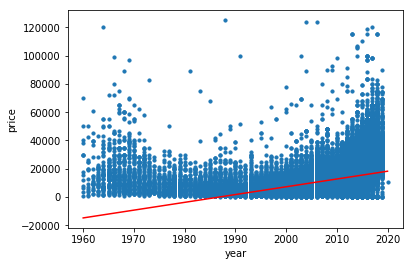

In [136]:
lasso.fit(x_year, Y)

y_predicted = lasso.predict(x_year)

# model evaluation
rmse = mean_squared_error(Y, y_predicted)
r2 = r2_score(Y, y_predicted)

# printing values
print('Slope:' ,lasso.coef_)
print('Intercept:', lasso.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x_year, Y, s=10)
plt.xlabel('year')
plt.ylabel('price')

# predicted values
plt.plot(x_year, y_predicted, color='r')
plt.show()

TypeError: ignored

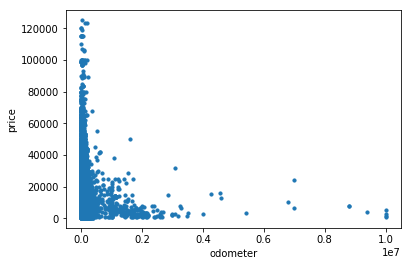

In [141]:
plt.scatter(x_odometer, Y, s=10)
plt.xlabel('odometer')
plt.ylabel('price')

y_predicted = lasso.predict(x_odometer,x_year)

plt.plot(x_odometer, y_predicted, color='r')
plt.show()

**********************************************************************************************

# VISUALIZATION

####Data Visualization

####Labelling 

####Data Plotting

####Regression r-squared values


# DISCUSSION

####Model Implications

####Fictional Instance

####Potential accuracy in interpolation and extrapolration

# SUMMARY

####Conclusion

####Future Aspects

####Knowledge gathered

# REFERENCES

Austin Reese (2019) "Used Cars Dataset" Vehicles listings from Craigslist.org. Available at: https://www.kaggle.com/austinreese/craigslist-carstrucks-data/version/7.


Tomesh, T. (2019). titanic.ipynb. Available at: https://colab.research.google.com/drive/1KftGp4lGzd7PJuKWq9qDv3xnxiQbwhwY#scrollTo=Y2tOGJ2UYPVi [Accessed 16 Aug. 2019].


Stach Overflow (2019) Available at https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame [Accessed 17 Aug 2019]


TutorialsPoint (2019 )Available at https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.html [Accessed 18 Aug 2019]


Chris ALbon (2017), "Using Seaborn To Visualize A pandas Dataframe"  Available at: https://chrisalbon.com/python/data_wrangling/pandas_with_seaborn/  [Accessed 18 Aug 2019]


Marco Peixeiro (2019), "How to Perform Lasso and Ridge Regression in Python" Available at: https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8
[Accessed 25 Aug 2019]